In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

# special matplotlib command for global plot configuration
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'

#Section 5: Clustering Continued and NLP

###Last time
- GMM for Clustering
- EM algorithm


###Today
- silhouette_score for evaluating cluster models
- NLP with nltk and sklearn

**Before you begin, you should download the resources associated with the nltk library.**  Open a terminal, and install the nltk package if you haven't already with 

```
conda install nltk
```

Then open a python shell (preferably your python 3.4 shell) and install the resources with 

```
import nltk
nltk.download()
```

This should launch a download application that looks like the image below.  Select the 'book' material and click download. It could take a little bit of time to complete. 

<img src='nltk_download.png'>

##Clustering review

We'll start with an example used in the last section.  Old Faithful.  

In [2]:
faithful = sm.datasets.get_rdataset("faithful")

In [5]:
sm.datasets.get_rdataset?

In [6]:
faithful.title

'Old Faithful Geyser Data'

In [7]:
old_faithful = faithful.data
old_faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


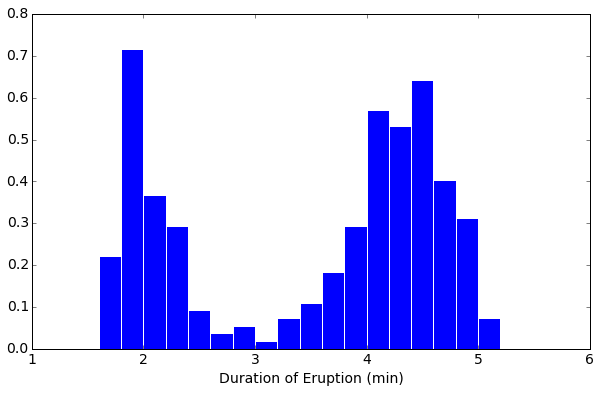

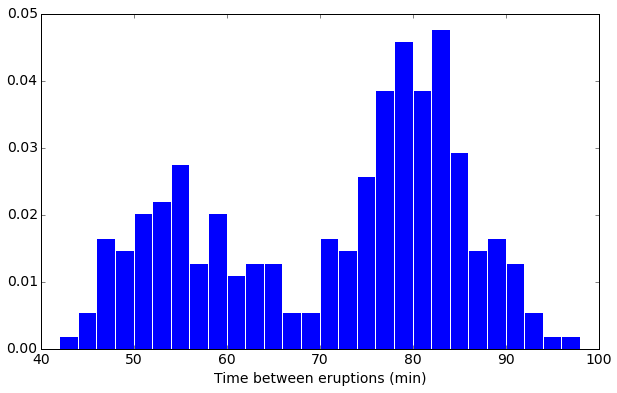

In [8]:
plt.hist(old_faithful.eruptions, bins = np.arange(1,6,.2), normed=True)
plt.xlabel('Duration of Eruption (min)')
plt.show()
plt.hist(old_faithful.waiting, bins = np.arange(40,100,2), normed=True)
plt.xlabel('Time between eruptions (min)')
plt.show()

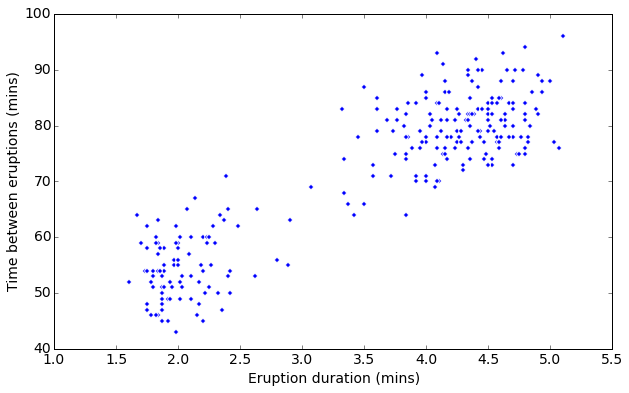

In [9]:
x, y = np.array(old_faithful.eruptions), np.array(old_faithful.waiting)
c = np.array([x,y])
c = c.T
plt.scatter(x,y)
plt.xlabel('Eruption duration (mins)')
plt.ylabel('Time between eruptions (mins)')
plt.show()

initialized mixing weights of each component 
[ 0.5  0.5]


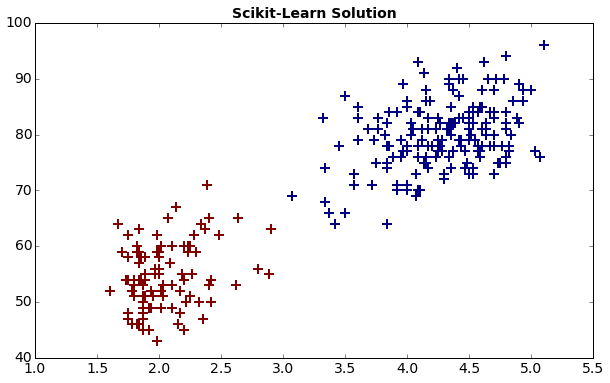

In [10]:
### Scikit-learn
#Initializes with zero means and identity covariances of components
#http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html
from sklearn import mixture

gm = mixture.GMM(n_components=2, n_iter=100, covariance_type='full')
print("initialized mixing weights of each component ")
print(gm.weights_)

gm.fit(c)
classes = gm.predict(c)
# print('')
# print classes
plt.scatter(c[:,0], c[:,1], c=classes, marker='+', s=100, linewidths=2)
plt.title('Scikit-Learn Solution', fontsize=14, fontweight='bold')

plt.show()

In [11]:
print("mixing weights after fit")
print(gm.weights_)
print("means for each component after fit")
print(gm.means_)
print("Covariances of components after fir")
print(gm.covars_)

mixing weights after fit
[ 0.64373194  0.35626806]
means for each component after fit
[[  4.29050323  79.97808339]
 [  2.03736795  54.4887805 ]]
Covariances of components after fir
[[[  0.16991429   0.92743463]
  [  0.92743463  35.90235533]]

 [[  0.07096393   0.44389055]
  [  0.44389055  33.76486659]]]


##Silhouette Score

Note that this link doesn't work but it will get you close!
[Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering) entry for Sihouette score.  

[Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) from Scikit-learn

In [12]:
from sklearn.metrics import silhouette_score

We can use the silhouette score to evaluate a particular cluster model.  Silhouette scores can be used to help evaluate the appropriate number of clusters that are truly in the data.  The value that is returned is an indicator of how closely grouped the data is.  Values close to 1 mean that the data are appropriately clustered.  If the returned value is close to -1 then the data more likely belongs in the neighboring cluster.  A value of 0 indicates that the data resides on the border of two natural clusters.  

In [13]:
gm = mixture.GMM(n_components=2, n_iter=100, covariance_type='full')
gm.fit(c)
classes = gm.predict(c)
silhouette_score(c, classes, metric='sqeuclidean')

0.85965912927602073

For n_clusters = 2 the average silhouette_score is 0.859659129276


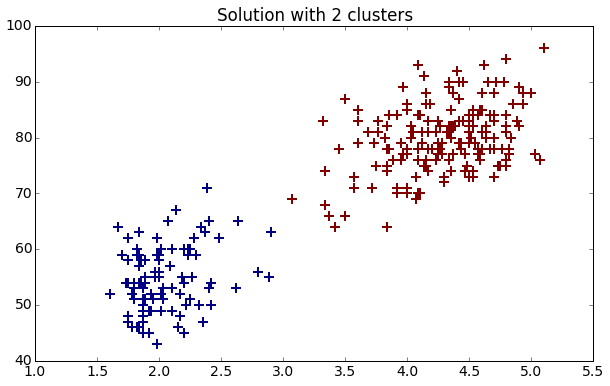

For n_clusters = 3 the average silhouette_score is 0.654079224417


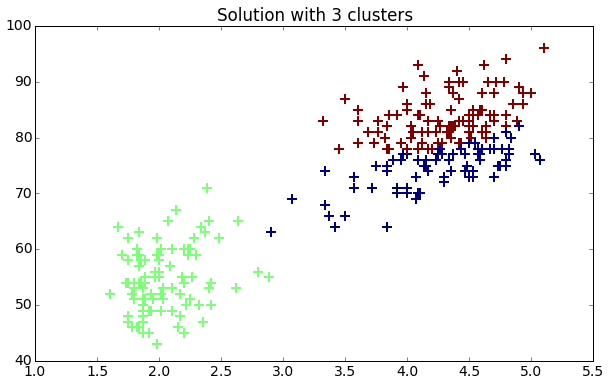

For n_clusters = 4 the average silhouette_score is 0.42270498592


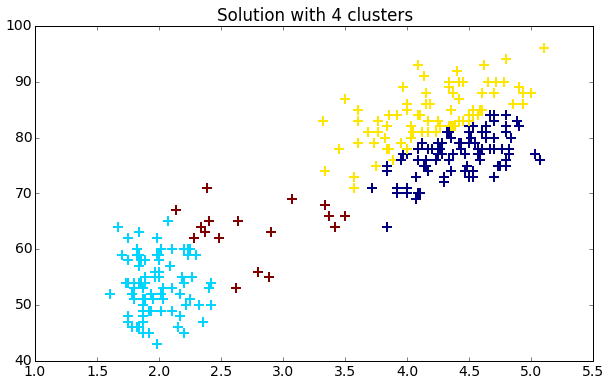

For n_clusters = 5 the average silhouette_score is 0.266633773093


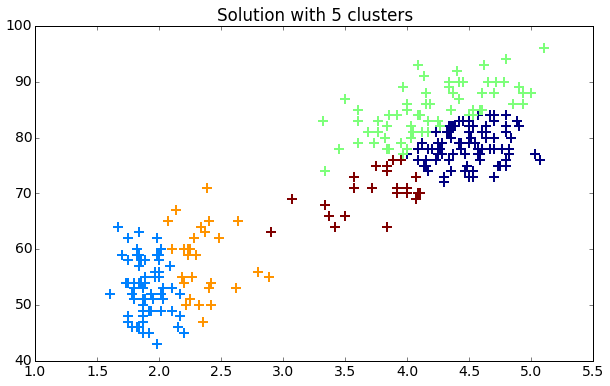

For n_clusters = 6 the average silhouette_score is 0.24309547637


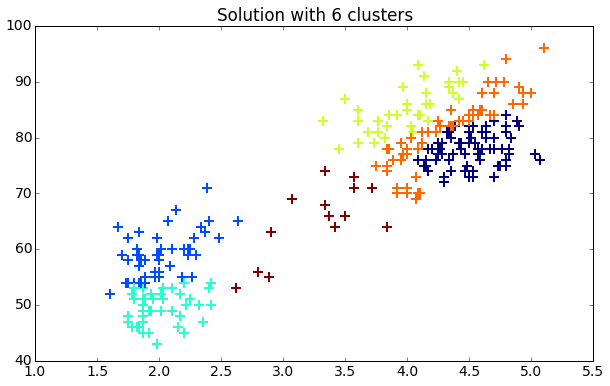

In [14]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # build the model and fit the data
    gm = mixture.GMM(n_components=n_clusters, n_iter=100, covariance_type='full')
    gm.fit(c)
    classes = gm.predict(c)
    silhouette_avg = silhouette_score(c, classes, metric='sqeuclidean')
    print('For n_clusters =', n_clusters, 'the average silhouette_score is', silhouette_avg)
    
    plt.scatter(c[:,0], c[:,1], c=classes, marker='+', s=100, linewidths=2)
    plt.title('Solution with %d clusters' % (n_clusters))
    plt.show()
    

##Natural Language Processing (NLP)

A quick introduction to NLP with Python using [nltk](http://www.nltk.org) and Scikit-learn.

**Start with some basic string processing**

In [15]:
monty = "Monty Python's Flying Circus. " 
monty

"Monty Python's Flying Circus. "

In [16]:
monty*2 + " Plus just the last word:" + monty[-8:]

"Monty Python's Flying Circus. Monty Python's Flying Circus.  Plus just the last word:Circus. "

In [17]:
monty.find('Python') #finds position of substring within string

6

In [18]:
monty.upper() +' and '+ monty.lower() # turn to upper or lower case. 

"MONTY PYTHON'S FLYING CIRCUS.  and monty python's flying circus. "

In [19]:
monty.replace('y', 'x') # replace letter y in the string with letter x. 

"Montx Pxthon's Flxing Circus. "

**Regular Expressions** 

If you plan to work with text, [regular expressions](https://docs.python.org/2/library/re.html) are extremely useful tools to become familar with 

In [20]:
import re

In [21]:
word = 'onomatopoeia'
len(re.findall(r'[aeiou]', word))

8

### NLP using NLTK

In [22]:
import nltk
from nltk.book import text4

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**List Comprehension**

What does the command below do?

In [23]:
len(set([word.lower() for word in text4 if len(word) > 5]))

7339

What does the set method do?

In [24]:
set(['a', 'b', 'a', 'c', 'b', ])

{'a', 'b', 'c'}

In [25]:
[element.upper() for element in text4[0:5]]

['FELLOW', '-', 'CITIZENS', 'OF', 'THE']

**Words in context**

NLTK books are Text objects that have many built-in methods available like searching for results and also returning the context. 

In [26]:
text = nltk.Text('This is some text that could be a sentence.')

In [69]:
text4.concordance(".")

Displaying 25 of 4676 matches:
d on the 14th day of the present month . On the one hand , I was summoned by my
 gradual waste committed on it by time . On the other hand , the magnitude and 
arly conscious of his own deficiencies . In this conflict of emotions all I dar
umstance by which it might be affected . All I dare hope is that if , in execut
he partiality in which they originated . Such being the impressions under which
s the functions allotted to his charge . In tendering this homage to the Great 
low citizens at large less than either . No people can be bound to acknowledge 
n more than those of the United States . Every step by which they have advanced
essings which the past seem to presage . These reflections , arising out of the
o strongly on my mind to be suppressed . You will join with me , I trust , in t
ernment can more auspiciously commence . By the article establishing the execut
to which your attention is to be given . It will be more consistent with those 
ters sele

In [33]:
text4.findall('<America>')

America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; America;
America; America; America; America; America; America; A

In [28]:
text4.similar?

In [30]:
text4.similar('citizen')

people states world union constitution executive government right
country time effort president power future nation man land mind sound
principles


In [34]:
text4.common_contexts?

In [35]:
text4.common_contexts(['America', 'freedom'])

in_and of_will of_is of_it of_s of_we of_the of_and the_of that_is
of_have for_is to_and and_will in_s of_in for_and


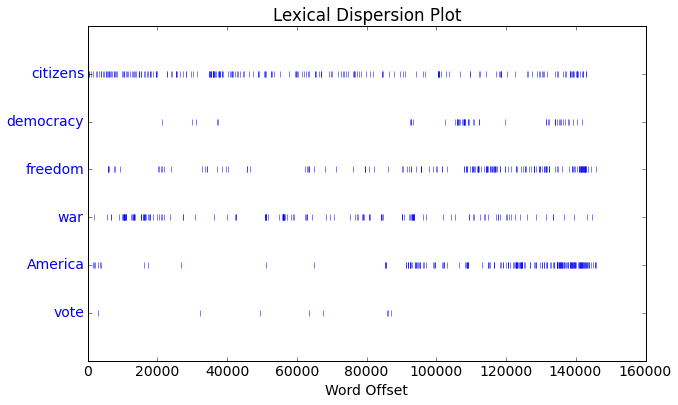

In [36]:
from nltk.draw.dispersion import dispersion_plot
dispersion_plot(text4, ["citizens", "democracy", "freedom", "war", "America", "vote"])

** Simple Statistics **

- Frequency distribution of words.  Find the counts for each word in the text

In [37]:
from nltk import FreqDist
freq_dist = FreqDist(text4)
freq_dist

FreqDist({'the': 9281, 'of': 6970, ',': 6840, 'and': 4991, '.': 4676, 'to': 4311, 'in': 2527, 'a': 2134, 'our': 1905, 'that': 1688, ...})

- Access the entire list of words in a text

In [38]:
vocabulary = list(freq_dist.keys()) # list of all the distinct types in the text
vocabulary[:3] # look at first 3

['warming', 'residents', 'writers']

- identify specific sets of words (e.g. long words) to help characterize the body of text

In [39]:
words = set(text4)
long_words = [word for word in words if len(word) > 15]
sorted(long_words)

['RESPONSIBILITIES',
 'antiphilosophists',
 'constitutionally',
 'contradistinction',
 'discountenancing',
 'disqualification',
 'enthusiastically',
 'instrumentalities',
 'internationality',
 'irresponsibility',
 'misappropriation',
 'misrepresentation',
 'misunderstanding',
 'responsibilities',
 'sentimentalizing',
 'transcontinental',
 'uncharitableness',
 'unconstitutional']

##Lexical Resources from nltk

NLTK provides several corpora (linguistic annotations, POS tags, named entities, syntactic structures, semantic roles, etc.) along with convenient methods to access these resources. The full list of corpora resources is available [here](http://www.nltk.org/book/ch02.html#tab-corpora)



### Counting words by genre

The [Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus) is a text collection that contains over 500 samples of english text that have been labeled with part-of-speech (POS) and genre.  It has been one of the most widely used collections in computational linguistics (statistical modeling of natual language)

In [40]:
from nltk.corpus import brown

In [41]:
cfd = nltk.ConditionalFreqDist((genre, word) 
                               for genre in brown.categories() 
                               for word in brown.words(categories=genre))

In [42]:
cfd.conditions()

['reviews',
 'hobbies',
 'belles_lettres',
 'news',
 'romance',
 'science_fiction',
 'fiction',
 'adventure',
 'religion',
 'learned',
 'mystery',
 'humor',
 'government',
 'lore',
 'editorial']

Now instead of simply looking at the frequency distribution of words in a text, these methods allow inspection of word frequency distribution by genre. 

In [43]:
genre_word = [(genre, word) 
              for genre in ['government', 'religion'] 
              for word in brown.words(categories=genre)]

In [44]:
genre_word[:4]

[('government', 'The'),
 ('government', 'Office'),
 ('government', 'of'),
 ('government', 'Business')]

In [45]:
genre_word[-4:]

[('religion', 'Fidel'),
 ('religion', "Castro's"),
 ('religion', 'regime'),
 ('religion', '.')]

Create a new condiation frequency distribution

In [46]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['government', 'religion']

In [47]:
print(cfd['religion'])

<FreqDist with 6373 samples and 39399 outcomes>


In [49]:
cfd['government'].most_common(10)

[('the', 4143),
 (',', 3405),
 ('of', 3031),
 ('.', 2493),
 ('and', 1923),
 ('to', 1829),
 ('in', 1319),
 ('a', 867),
 ('for', 806),
 ('is', 649)]

### Stopwords

Another corpus of stopwords is also included in the nltk resources.  These are the high-frequency words like 'the', 'to', 'of', etc. that have little lexical content and contribute little to a text's distinguising characteristics

In [50]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

We can remove the stopwords from the text and then rerun the processing

In [51]:
filtered_genre_word = [word 
                       for word in genre_word 
                       if word[1].lower() not in stopwords.words('english')]

In [52]:
filtered_cfd = nltk.ConditionalFreqDist(filtered_genre_word)
filtered_cfd.conditions()

['government', 'religion']

In [53]:
filtered_cfd['religion'].most_common(10)

[(',', 1913),
 ('.', 1382),
 (';', 308),
 ('``', 270),
 ("''", 266),
 ('?', 148),
 ('God', 131),
 (')', 127),
 (':', 123),
 ('--', 110)]

### Punctuation

We can also remove punctuation from text

In [54]:
import string

In [55]:
clean_genre_word = [word 
                    for word in filtered_genre_word 
                    if word[1] not in string.punctuation]

In [58]:
clean_cfd = nltk.ConditionalFreqDist(clean_genre_word)
clean_cfd['religion'].most_common(10)

[('``', 270),
 ("''", 266),
 ('God', 131),
 ('--', 110),
 ('world', 90),
 ('one', 87),
 ('may', 78),
 ('new', 77),
 ('would', 68),
 ('man', 64)]

### Stemming using NLTK

Stemming is a reference to the process of reducing inflected or derived words to their word stem, base or root form.  There are several algorithms for stemming available today.  Most stemming algorithms function through the use of a lookup table, which is simple and effecient for languages like english but could prove difficult for other languages where inflection plays a bigger role. 

In [59]:
stem_text = 'cats catlike catty cat stemmer stemming stemmed stem fishing fished fisher fish'

In [60]:
stem_text

'cats catlike catty cat stemmer stemming stemmed stem fishing fished fisher fish'

- The text must first be broken up into tokens.  We can use the word_tokenize method here.  There's also a method [sent_tokenize](http://www.nltk.org/api/nltk.tokenize.html) to break up larger pieces of text into sentences. 

In [61]:
tokens = nltk.word_tokenize(stem_text)

In [62]:
tokens

['cats',
 'catlike',
 'catty',
 'cat',
 'stemmer',
 'stemming',
 'stemmed',
 'stem',
 'fishing',
 'fished',
 'fisher',
 'fish']

### Porter Stemmer

The [Porter Stemmer](http://tartarus.org/~martin/PorterStemmer/) is one of the more widely used stemming algorithms. 

In [63]:
porter = nltk.PorterStemmer()
stemmed = [porter.stem(t) for t in tokens]
stemmed

['cat',
 'catlik',
 'catti',
 'cat',
 'stemmer',
 'stem',
 'stem',
 'stem',
 'fish',
 'fish',
 'fisher',
 'fish']

### Snowball stemmer

The [snowball stemmer](http://snowball.tartarus.org/) is based on a language that was developed specifically for stemming algorithms.  

In [64]:
snowball = nltk.SnowballStemmer('english')
snowball_stemmed = [snowball.stem(t) for t in tokens]
snowball_stemmed

['cat',
 'catlik',
 'catti',
 'cat',
 'stemmer',
 'stem',
 'stem',
 'stem',
 'fish',
 'fish',
 'fisher',
 'fish']

### Lancaster stemmer

The [Lancaster stemmer](http://www.lancaster.ac.uk/scc/) was developed at the University of Lancaster from where it gets its name. 

In [65]:
lancaster = nltk.LancasterStemmer()
lancaster_stemmed = [lancaster.stem(t) for t in tokens]
lancaster_stemmed

['cat',
 'catlik',
 'catty',
 'cat',
 'stem',
 'stem',
 'stem',
 'stem',
 'fish',
 'fish',
 'fish',
 'fish']

## Text Similarity with TF-IDF

The tf-idf (term frequency-inverse document frequency) is used to weigh how important a word of a document is in a document collection. It is often used as a weighting factor in information retrieval and data mining. So, tf-idf weight for a term is the product of its term frequency (tf) weight and inverse document freqency (idf) weight.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

Load some simple text and calculate a comparison matrix

In [67]:
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["New Year's Eve in New York",
                            "New Year's Eve in London",
                            "York is closer to London than to New York",
                            "London is closer to Bucharest than to New York"])

In [68]:
cosine=(tfidf * tfidf.T).A
print(cosine)

[[ 1.          0.82384531  0.28730789  0.20464882]
 [ 0.82384531  1.          0.16511247  0.1679379 ]
 [ 0.28730789  0.16511247  1.          0.89268279]
 [ 0.20464882  0.1679379   0.89268279  1.        ]]


##NLP tools and beyond

This is fun, but what is next?

[Text clustering](https://gist.github.com/xim/1279283).  Try downloading this code and executing it on your own. 